# Predicting Sales E-Commerce

* Accurate sales forecasts enable retailers to more precisely plan for the future of an e-commerce business. Sales forecasting is an important part of meeting customer expectations and provides insight into how the market will react to any given product.

* We live in the world of e-commerce. We see tons of different stores here and there through the web. Internet made it possible to trade with anyone and everywhere. We can buy goods without leaving our house, we can compare prices in different stores within seconds, we can find what we really want and do not accept just the first more or less suitable offer. And I believe it would be really interesting to look at this world through the data it produces. That's why I decided to play around with e-commerce numbers and try to understand it better.

* The data used in this analysis is taken from Kaggle dataset "E-Commerce Data | Actual transactions of UK retailer".

* This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

* As always, we start our analysis by setting up our environment and by importing necessary libraries.

* We import standard numpy and pandas to be able to perform analysis with Python, also we need data visualization libraries matplotlib and seaborn to output interesting visual findings.
Predicting sales in e-commerce is a critical aspect of managing an online retail business. Accurate sales predictions can help you make informed decisions about inventory management, marketing strategies, and overall business growth. Here are some key methods and considerations for predicting sales in e-commerce:
1. Historical Data Analysis:
* Start by analyzing your historical sales data. Look at trends, seasonality, and any    patterns that may emerge. This data can provide valuable insights into past performance.
2. Time Series Forecasting:
* Time series forecasting methods, such as ARIMA (AutoRegressive Integrated Moving Average) or Prophet, can be used to predict future sales based on past sales data. These models take into account seasonality and trends.
3. Machine Learning Models:

* Machine learning models like regression, decision trees, random forests, and neural networks can be trained on historical data to make predictions. Feature engineering, which involves selecting and transforming relevant input features, is crucial for these models.
4. Customer Segmentation:

* Segment your customer base to identify different groups with varying buying behaviors. This can help you tailor marketing efforts and predict sales more accurately for each segment.
5. External Factors:

* Consider external factors that can influence sales, such as holidays, economic conditions, and industry trends. Incorporating these factors into your models can improve their accuracy.
6. Inventory Management:

* Accurate sales predictions are essential for inventory management. Overstocking or understocking can lead to lost sales or excess costs. Make sure your predictions align with your inventory levels.
7. Marketing Campaign Analysis:

* Analyze the impact of marketing campaigns on sales. Attribution modeling can help you understand which marketing efforts are driving the most sales, allowing you to optimize your marketing strategy.
8. A/B Testing:

* Conduct A/B tests to experiment with different strategies and determine which ones have the most significant impact on sales. This can help refine your predictions over time.
9. Customer Feedback and Reviews:

* Pay attention to customer feedback and product reviews. Negative feedback can lead to decreased sales, while positive feedback can boost sales. Monitor sentiment and address customer concerns promptly.
10. Forecasting Tools:

* Consider using specialized forecasting software or e-commerce analytics platforms that offer pre-built models and dashboards tailored for sales predictions.
11. Continuous Monitoring and Iteration:

* Sales prediction models should be regularly monitored and updated as new data becomes available. E-commerce is dynamic, and market conditions can change rapidly.
12. Use of AI and Predictive Analytics:

* Advanced artificial intelligence and predictive analytics techniques, such as deep learning and reinforcement learning, can provide more accurate and automated sales predictions, especially for large datasets.

Remember that sales predictions are not always 100% accurate, but with consistent refinement and the use of various data sources and models, you can improve their accuracy over time. Additionally, be prepared to adapt your strategies based on the insights gained from your predictions to maximize your e-commerce success.

Online Retail Data Set: [Dataset](http://archive.ics.uci.edu/dataset/352/online+retail)

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
import os
os.listdir("/kaggle/input/online-retail-dataset")

['OnlineRetail.csv']

In [4]:
df = pd.read_csv("/kaggle/input/online-retail-dataset/OnlineRetail.csv", encoding="latin", dtype={'CustomerID': str})

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


* Just by looking at the first 5 rows of our table, we can understand the structure and datatypes present in our dataset.
* We can notice that we will have to deal with time series data, integers and floats, and categorical, and text data.

# Exploratory Data Analysis(EDA)

* Every data science project starts with EDA as we have to understand what do we have to deal with.
* I divide EDA into 2 types: visual and numerical. Let's start with numerical as the simple pandas method .describe() gives us a lot of useful information.

## Quick statistical overview

In [6]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


* Just a quick look at data with the .describe() method gives us a lot of space to think.
* We see negative quantities and prices, and we can see that not all records have CustomerID data.
* We can also see that the majority of transactions are for quantities from 3 to 10 items, majority of items have prices up to 5 pounds.
* We have a bunch of huge outliers we will have to deal with later.

## Dealing with types

* .read_csv() method performs basic type check, but it doesn't do that perfectly.
* That's why it is much better to deal with data types in our dataframe before any modifications to prevent additional difficulties.
* Every pandas dataframe has an attribute .dtypes which will help us understand what we currently have and what data has to be casted to correct types.

In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

* If we have DateTime data it's better to cast it to DateTime type.
* We don't touch InvoiceNo for now as it seems like data in this column has not only numbers.
* We saw just the first 5 rows, while pandas during import scanned all the data and found that the type here is not numerical.

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom


## Dealing with null values

* Next and very important step is dealing with missing values.

* Normally if you encounter null values in the dataset you have to understand nature of those null values and possible impact they could have on the model.
 
* There are few strategies that we can use to fix our issue with null values:
 
 * delete rows with null values
 * delete the feature with null values
 * impute data with mean or median values or use another imputing strategy (method  .fillna())

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* CustomerID has too many null values and this feature cannot predict a lot so we can just drop it.
* It could be reasonable to create another feature "Amount of orders per customer".

In [11]:
df = df.drop(columns=['CustomerID'])

### Let's check out what kind of nulls we have in description: 

In [12]:
df[df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 11:52:00,536414,22139,NaN,56,0.0,United Kingdom
2010-12-01 14:32:00,536545,21134,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536546,22145,NaN,1,0.0,United Kingdom
2010-12-01 14:33:00,536547,37509,NaN,1,0.0,United Kingdom
2010-12-01 14:34:00,536549,85226A,NaN,1,0.0,United Kingdom


* The data in these rows is pretty strange as UnitPrice is 0, so these orders do not generate any sales.
* We can impute it with "UNKNOWN ITEM" at the moment and deal with those later during the analysis.

In [13]:
df['Description'] = df['Description'].fillna('UNKNOWN ITEM')
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

* It makes sense to go feature by feature and check what pitfalls we have in our data and also to understand our numbers better.

* Let's continue checking the Description column. Here we can see items that were bought most often.

In [14]:
df['Description'].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: count, dtype: int64

Here we can see our best-selling products, items that appear in orders the most often.

# To make it visually more appealing let's create a bar chart for 15 top items

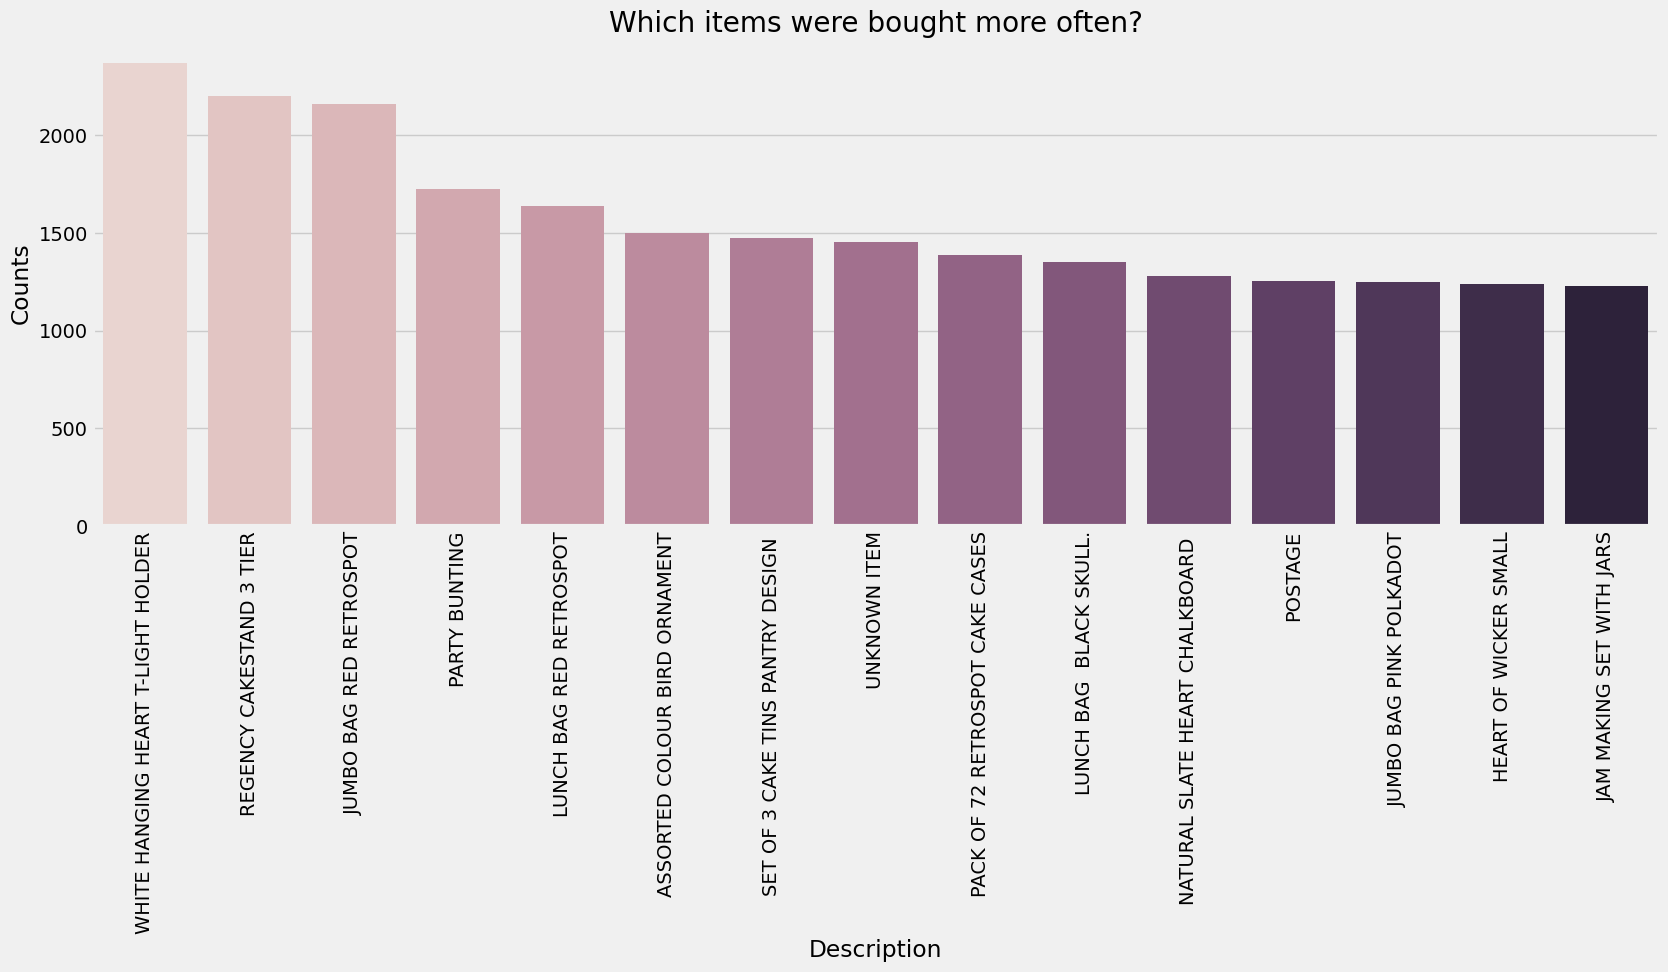

In [15]:
# Which items were bought more often?
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);


In [16]:
df['Description'].value_counts().tail()

Description
wrongly coded 23343         1
M/COLOUR POM-POM CURTAIN    1
ROCOCO WALL MIROR           1
Amazon Adjustment           1
wrongly marked 23343        1
Name: count, dtype: int64

* We also notice from the above code that valid items are normally uppercase and non-valid or cancelations are in lowercase.

In [17]:
df[~df['Description'].str.isupper()]['Description'].value_counts().head()

Description
Manual                                572
BAG 125g SWIRLY MARBLES               304
BAG 250g SWIRLY MARBLES               252
3 TRADITIONAl BISCUIT CUTTERS  SET    240
POLYESTER FILLER PAD 40x40cm          193
Name: count, dtype: int64

* A quick check of the case of letters in the Description says that there are some units with lowercase letters in their name and also that lowercase records are for canceled items.
* Here we can understand that data management in the store can be improved.

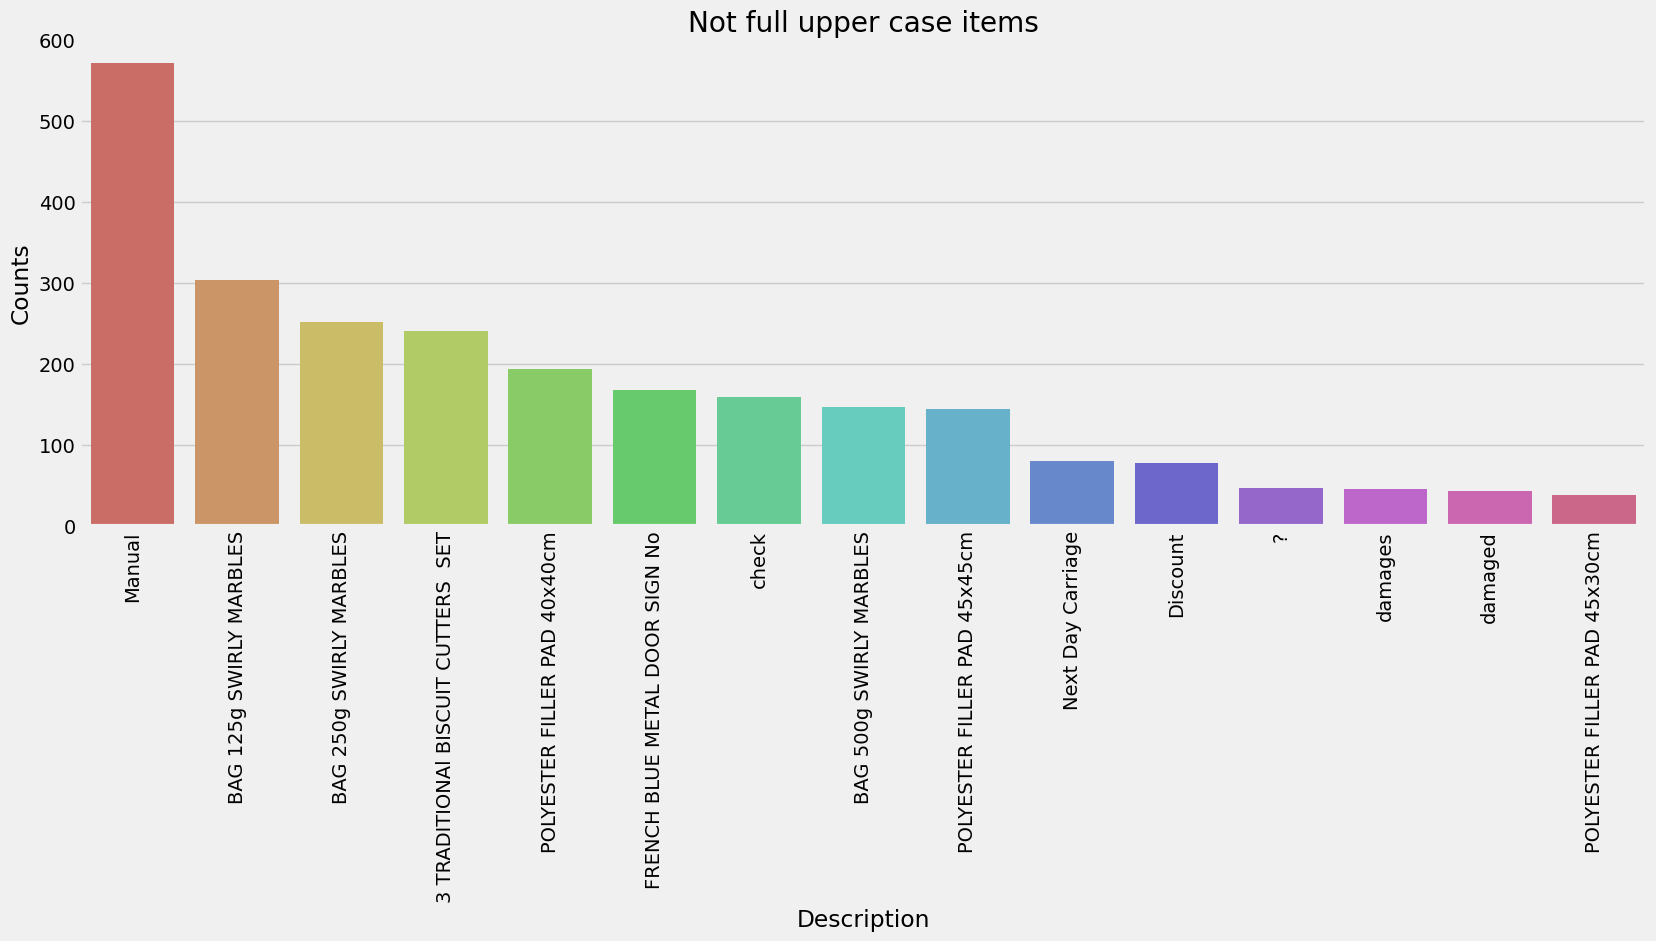

In [18]:
# Not full upper case items
lcase_counts = df[~df['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=lcase_counts.index, y=lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

* Checking out stoke codes looks like they are deeply correlated with descriptions - which makes perfect sense.

In [19]:
df['StockCode'].value_counts().head()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: count, dtype: int64

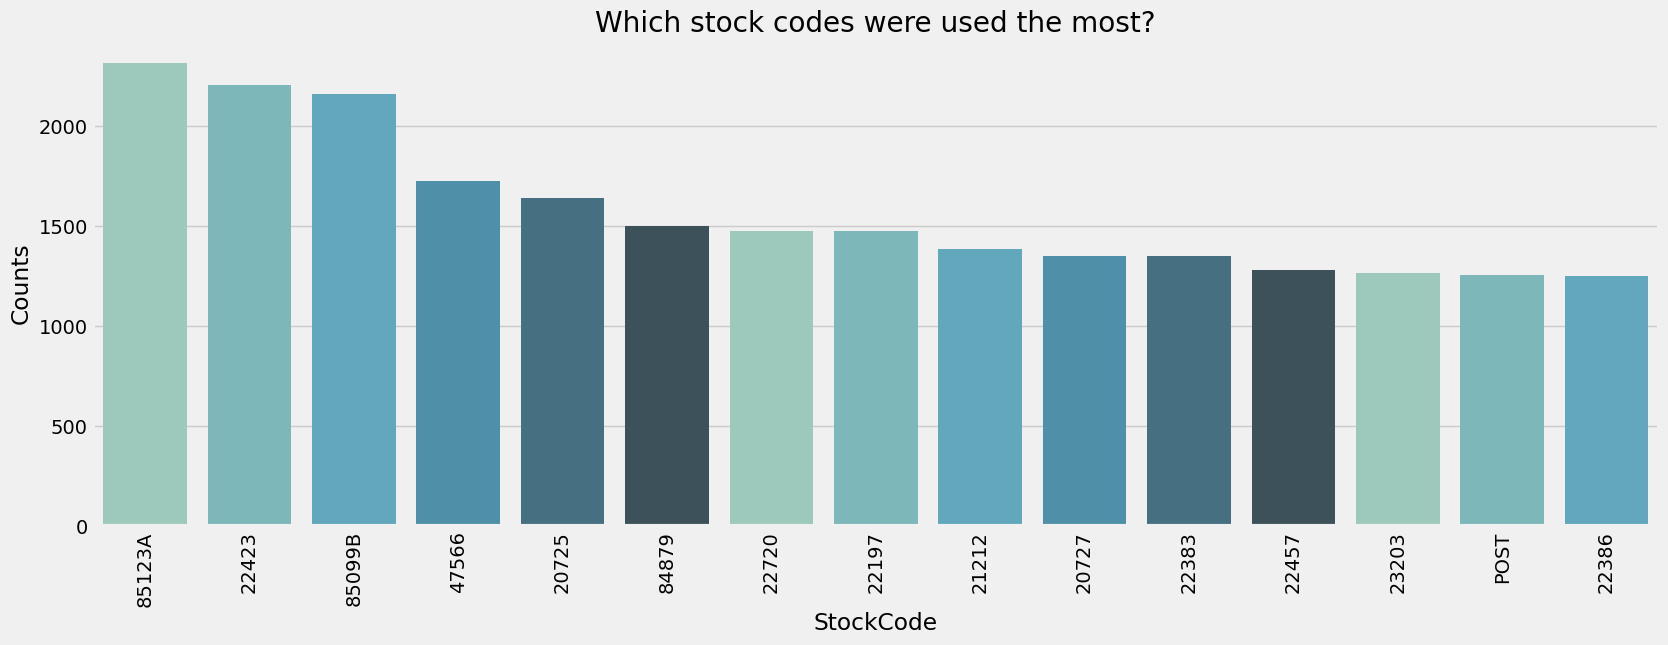

In [20]:
# Which stock codes were used the most?
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

# Checking out also InvoiceNo feature

In [21]:
df['InvoiceNo'].value_counts().tail()

InvoiceNo
C573244    1
573231     1
573230     1
573273     1
C573180    1
Name: count, dtype: int64

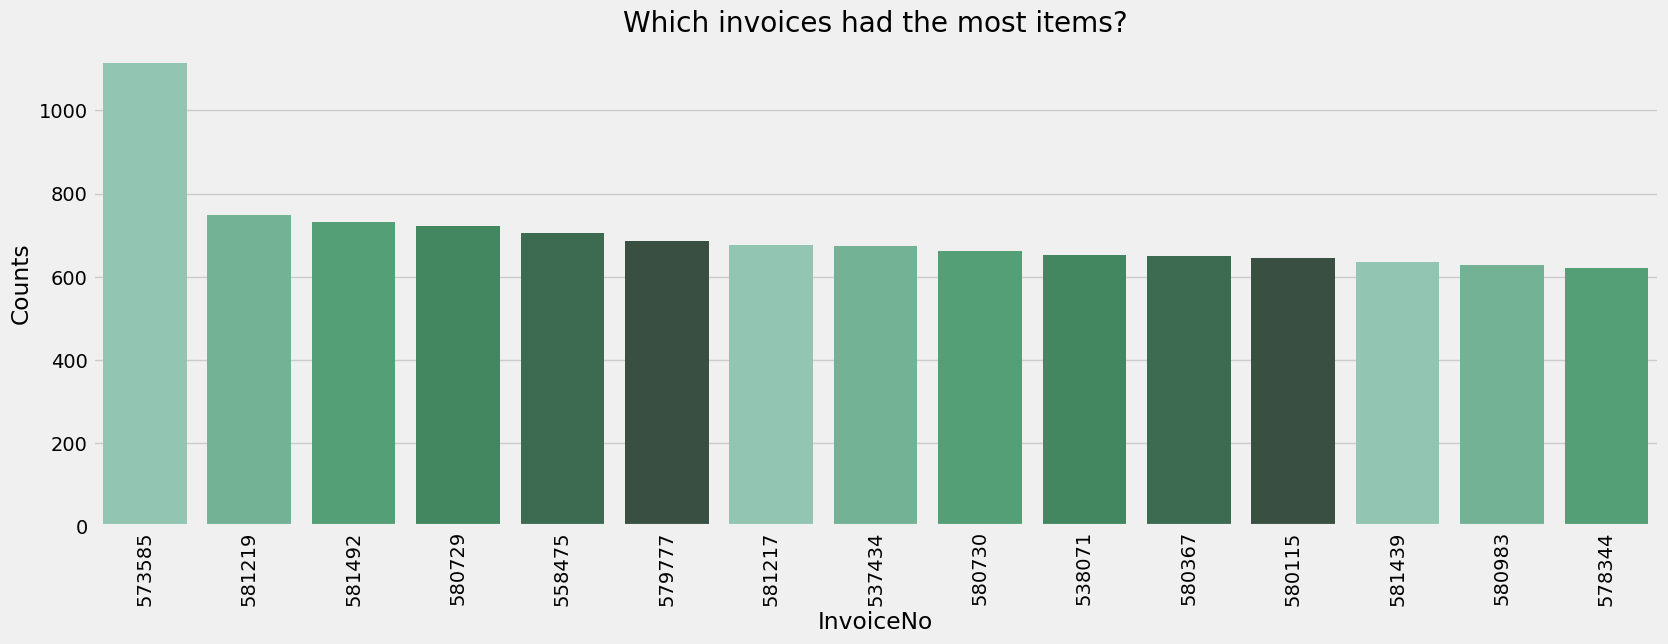

In [22]:
#  Which invoices had the most items?
inv_counts = df['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=inv_counts.index, y=inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

In [23]:
df[df['InvoiceNo'].str.startswith('C')].describe()

,Quantity,UnitPrice
count,9288.000000,9288.000000
mean,-29.885228,48.393661
std,1145.786965,666.600430
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,5.950000
max,-1.000000,38970.000000


* Looks like Invoices that start with 'C' are the "Canceling"/"Returning" invoices. This resolves the mystery of negative quantities.

* Although, we should've gotten deeper into the analysis of those returns, for the sake of simplicity let's just ignore those values for the moment.

* We can actually start a separate project based on that data and predict the returning/canceling rates for the store.

In [24]:
df = df[~df['InvoiceNo'].str.startswith('C')]

In [25]:
df.describe()

,Quantity,UnitPrice
count,532621.000000,532621.000000
mean,10.239972,3.847621
std,159.593551,41.758023
min,-9600.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


* During exploratory data analysis we can go back to the same operations and checks, just to understand how our actions affected the dataset.

* EDA is the series of repetitive tasks to understand better our data.

* Here, for example we get back to .describe() method to get an overall picture of our data after some manipulations.

* We still see negative quantities and negative prices, let's get into those records.

In [26]:
# df[df['Quantity'] < 0]
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2010-12-01 16:50:00,536589,21777,UNKNOWN ITEM,-10,0.0,United Kingdom
2010-12-02 14:42:00,536764,84952C,UNKNOWN ITEM,-38,0.0,United Kingdom
2010-12-03 15:30:00,536996,22712,UNKNOWN ITEM,-20,0.0,United Kingdom
2010-12-03 15:30:00,536997,22028,UNKNOWN ITEM,-20,0.0,United Kingdom
2010-12-03 15:30:00,536998,85067,UNKNOWN ITEM,-6,0.0,United Kingdom


* Here we can see that other "Negative quantities" appear to be damaged/lost/unknown items.
* Again, we will just ignore them for the sake of simplicity of analysis for this project.

In [27]:
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,UnitPrice
count,531285.000000,531285.000000
mean,10.655262,3.857296
std,156.830323,41.810047
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [28]:
df[df['UnitPrice'] < 0].describe()

,Quantity,UnitPrice
count,2.0,2.00
mean,1.0,-11062.06
std,0.0,0.00
min,1.0,-11062.06
25%,1.0,-11062.06
50%,1.0,-11062.06
75%,1.0,-11062.06
max,1.0,-11062.06


In [29]:
df[df['UnitPrice'] == -11062.06]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
InvoiceDate,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,United Kingdom
2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,United Kingdom


* As there are just two rows, let's ignore them for the moment (the description gives us enough warnings, although we still need some context to understand it better)

In [30]:
df = df[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


* As we have finished cleaning our data and removed all suspicious records we can start creating some new features for our model.
* Let's start with the most obvious one - Sales.
* We have quantities, we have prices - we can calculate the revenue.

# Visual EDA

(array([0]), [Text(0, 0, 'United Kingdom')])

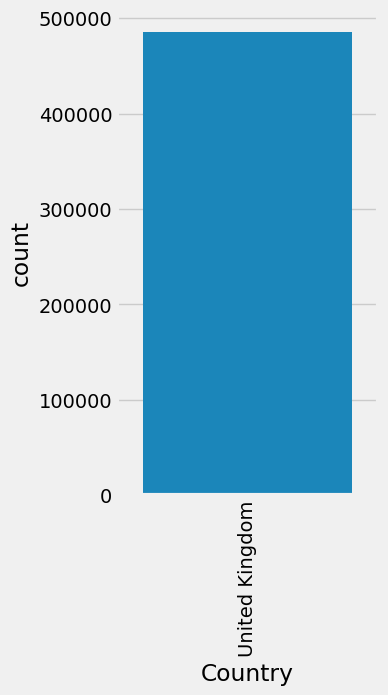

In [31]:
plt.figure(figsize=(3,6))
sns.countplot(x=df[df['Country'] == 'United Kingdom']['Country'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Norway'),
  Text(5, 0, 'EIRE'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'Portugal'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Belgium'),
  Text(12, 0, 'Lithuania'),
  Text(13, 0, 'Japan'),
  Text(14, 0, 'Iceland'),
  Text(15, 0, 'Channel Islands'),
  Text(16, 0, 'Denmark'),
  Text(17, 0, 'Cyprus'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'Finland'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Bahrain'),
  Text(22, 0, 'Israel'),
  Text(23, 0, 'Greece'),
  Text(24, 0, 'Hong Kong'),
  Text(25, 0, 'Singapore'),
  Text(26, 0, 'Lebanon'),
  Text(27, 0, 'United Arab Emirates'),
  Text(28, 0, 'Saudi Arabia'),
  Text(29, 0, 'Czech Republic'),
  Text(30, 0, 'Canada'

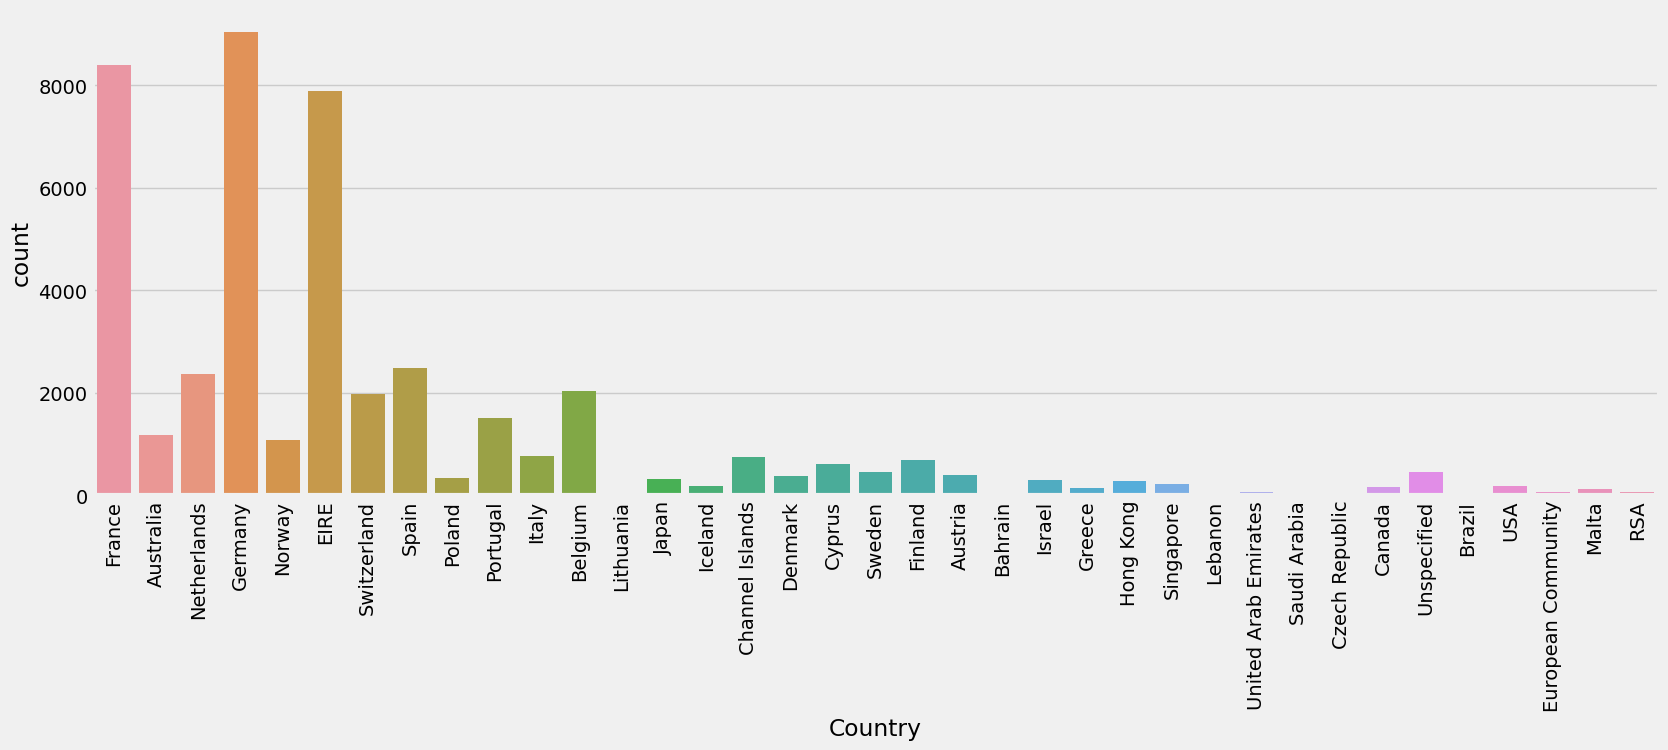

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(x=df[df['Country'] != 'United Kingdom']['Country'])
plt.xticks(rotation=90)

In [33]:
uk_count = df[df['Country'] == 'United Kingdom']['Country'].count()
all_count = df['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

91.51%


* From the above plots and calculations, we can see that the vast majority of sales were made in the UK and just 8.49% went abroad.
* We can say our dataset is skewed to the UK side.

# Detecting outliers

* There are a few different methods to detect outliers:

 * box plots,
 * using IQR,
 * scatter plot also works in some cases (and this is one of those).

**Detecting outliers using a scatter plot is pretty intuitive. You plot your data and remove data points that visually are definitely out of range. Like in the chart below:**

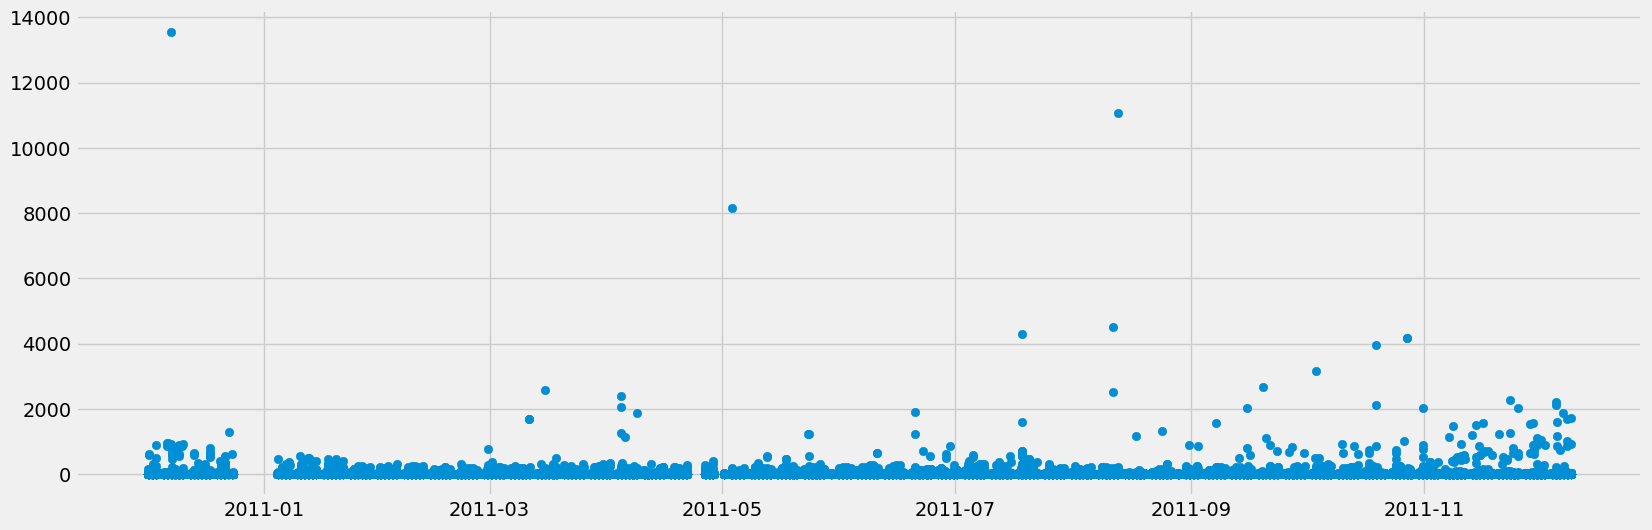

In [34]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['UnitPrice'])

## Remove obvious outliers:

(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(14975.0, 0, '2011-01'),
  Text(15034.0, 0, '2011-03'),
  Text(15095.0, 0, '2011-05'),
  Text(15156.0, 0, '2011-07'),
  Text(15218.0, 0, '2011-09'),
  Text(15279.0, 0, '2011-11')])

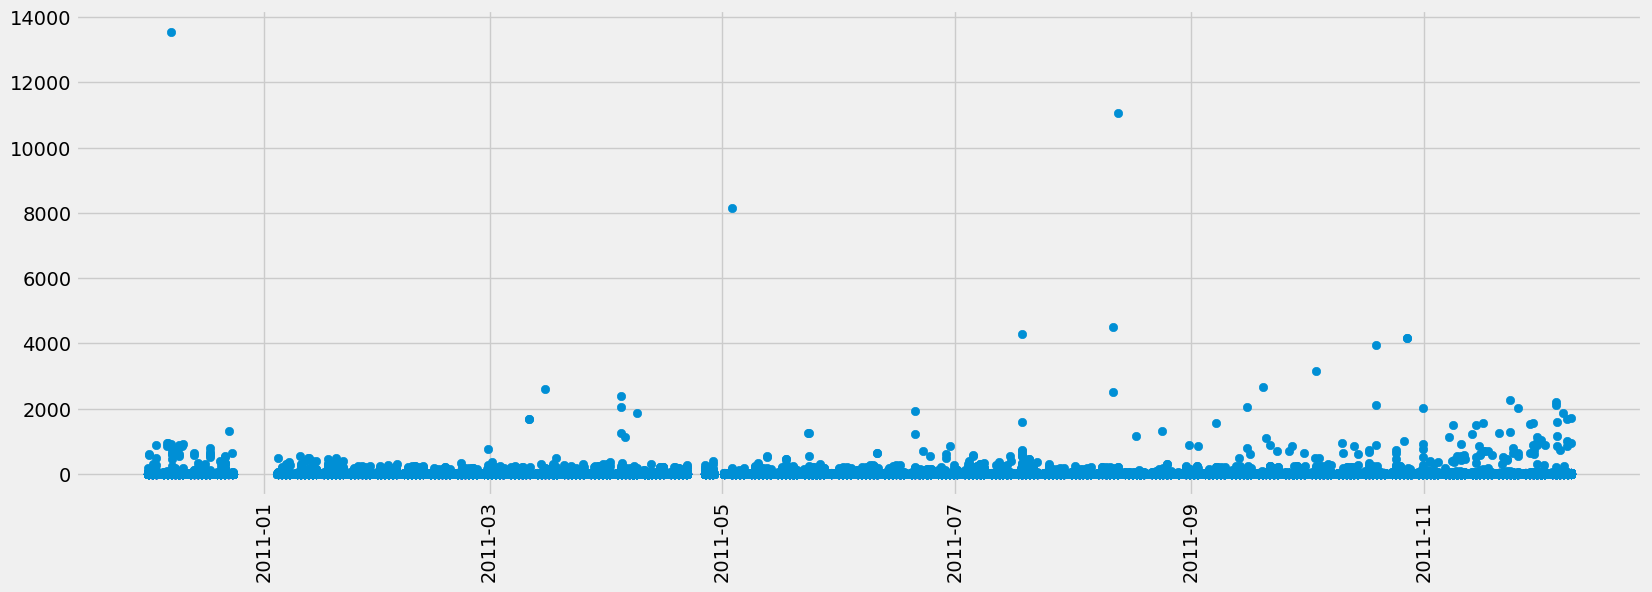

In [35]:
df = df[df['UnitPrice'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['UnitPrice'])
plt.xticks(rotation=90)

* After removing obvious outliers we still see some values that are out of normal distribution.

**To understand better the distribution of our data let's check out different percentiles of our numeric features:**

In [36]:
df.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

* We can see that if we remove the top 2% of our data points we will get rid of absolute outliers and will have a more balanced dataset.

In [ ]:
df_quantile = df[df['UnitPrice'] < 125]
plt.scatter(x=df_quantile.index, y=df_quantile['UnitPrice'])
plt.xticks(rotation=90)

In [ ]:
df_quantile.describe()

* Looks like our data is almost ready for modelling.
* We performed a clean up, we removed outliers that were disturbing the balance of our dataset, we removed invalid records.
* Now our data looks much better! and it doesn't lose it's value.

# Visually checking distribution of numeric features 

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 5]['UnitPrice'].values, kde=True, bins=10, color='green')

* From these histograms, we can see that the vast majority of items sold in this store have a low price range - 0 to 3 pounds.

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 30]['Quantity'], kde=True, bins=10, color='red')

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 15]['Quantity'], kde=True, bins=10, color='orange')

* From these histograms we that people bought normally 1-5 items or 10-12
* Maybe there was some kind of offers for sets?

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 60]['UnitPrice'], kde=True, bins=10, color='purple')

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 30]['UnitPrice'], kde=True, bins=10, color='grey')

* From these histograms, we can understand that majority of sales per order were in the range 1-15 pounds each.

## Analysing sales over time

In [ ]:
df_ts = df[['UnitPrice']]
df_ts.head()

* As we can see every invoice has its own timestamp (definitely based on the time the order was made).
* We can resample time data by, for example, weeks, and try to see if there are any patterns in our sales.

In [ ]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

* That week with 0 sales in January looks suspicious, let's check it closer.

In [ ]:
df_resample['12-2010':'01-2011']

* Now it makes sense - possibly, during the New Year holidays period the store was closed and didn't process orders, that's why they didn't make any sales.

## Preparing data for modeling and feature creation

* Now comes the most fun part of the project - building a model.
* To do this we will need to create a few more additional features to make our model more sophisticated.

In [ ]:
df_clean = df[df['UnitPrice'] < 15]
df_clean.describe()

In [ ]:
df_clean.index

## Quantity per invoice feature

* A feature that could influence the sales output could be "Quantity per invoice". Let's find the data for this feature.

In [ ]:
df_join = df_clean.groupby('InvoiceNo')[['Quantity']].sum()

In [ ]:
df_join = df_join.reset_index()
df_join.head()

In [ ]:
df_clean['InvoiceDate'] = df_clean.index
df_clean = df_clean.merge(df_join, how='left', on='InvoiceNo')
df_clean = df_clean.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df_clean.tail(15)

In [ ]:
df_clean.describe()

In [ ]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [ ]:
df_clean.dtypes

## Bucketing Quantity and UnitPrice features

* Based on the EDA done previously we can group these features into 6 buckets for Quantity and 5 for UnitePrice using the pandas.cut() method.

In [ ]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
df_clean['QuantityRange'] = pd.cut(df_clean['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
df_clean['PriceRange'] = pd.cut(df_clean['UnitPrice'], bins=bins_p)
df_clean.head()

## Extracting and bucketing dates

* We have noticed that depending on the season gifts sell differently:

 * pick of sales is in the Q4
 * then it drastically drops in Q1 of the next year
 * and continues to grow till its new pick in Q4 again.
* From this observation, we can create another feature that could improve our model.

In [ ]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean.head()

In [ ]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_clean['DateRange'] = pd.cut(df_clean['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df_clean.tail()

# Building a model

## Splitting data into UK and non-UK

* We have to analyze these 2 datasets separately to have more standardized data for a model because there can be some patterns that work for other countries and do not for the UK or vice versa.
* Also a hypothesis to test - does the model built for the UK performs well on data for other countries?

In [ ]:
df_uk = df_clean[df_clean['Country'] == 'United Kingdom']
df_abroad = df_clean[df_clean['Country'] != 'United Kingdom']

In [ ]:
df_uk.head()

## Extracting features and creating dummy variables

In [ ]:
df_uk_model = df_uk[['UnitPrice', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]

In [ ]:
df_uk_model.head()

In [ ]:
df_data = df_uk_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

# Scaling

* As the majority of our features are in the 0-1 range it would make sense to scale the "QuantityInv" feature too.
* In general, scaling features is normally a good idea.

In [ ]:
from sklearn.preprocessing import scale

df_data['QuantityInv'] = scale(df_data['QuantityInv'])

# Train-Test Split

* Now we have to split our data into train-test data to be able to train our model and validate its capabilities.

In [ ]:
y = df_data['UnitPrice']
X = df_data.drop(columns=['UnitPrice'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Testing and validating different models

* We use GridSearch and CrossValidation to test three types of regressors:
 * Linear
 * Decision Tree
 * RandomForest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression

In [ ]:
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree

In [ ]:
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest

In [ ]:
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

# Testing and validating

In [ ]:
cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))
  
  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_


# Creating summary Report

In [ ]:
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

# Visualizing results

In [ ]:
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary)

# Conclusions

* This is a basic analysis of a transactions dataset with a model that predicts sales.

* Random Forest Regressor appears to be the best model for our prediction with an R2 score of more than 0.6 which is not that bad.